# Part 1: Linear Interpolation

## Simple linear interpolation approach

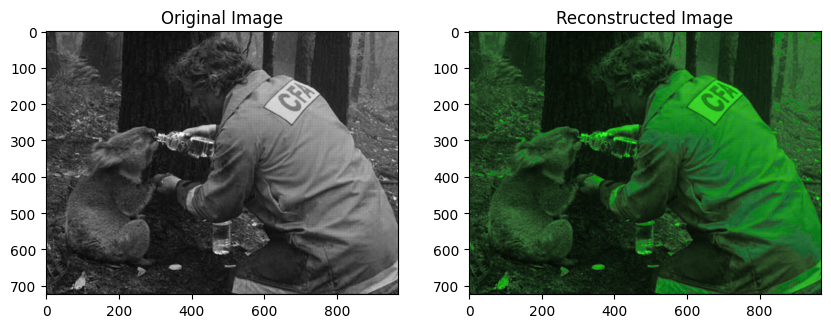

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def linear_interpolation_demosaicing(input_image):
    # Extract the individual color channels
    blue_channel = input_image[:, :, 0]
    green_channel = input_image[:, :, 1]
    red_channel = input_image[:, :, 2]

    # Reconstructed image with zeros
    reconstructed_image = np.zeros_like(input_image, dtype=np.float32)

    # Linear interpolation for green channel as green is more visible for human eye
    reconstructed_image[:, :, 1] = green_channel

    # Linear interpolation for blue channel
    reconstructed_image[1::2, 0::2, 0] = (blue_channel[:-1:2, 1::2] + blue_channel[1::2, 0::2]) / 2
    reconstructed_image[0::2, 1::2, 0] = (blue_channel[0::2, 0::2] + blue_channel[1::2, 1::2]) / 2

    # Linear interpolation for red channel
    reconstructed_image[0::2, 0::2, 2] = (red_channel[0::2, 1::2] + red_channel[1::2, 0::2]) / 2
    reconstructed_image[1::2, 1::2, 2] = (red_channel[:-1:2, 0::2] + red_channel[0::2, 1::2]) / 2

    # Convert the reconstructed image to uint8
    reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)

    return reconstructed_image

# Load the input image
input_image = cv2.imread('images/hope.bmp')


# Perform linear interpolation demosaicing
reconstructed_image = linear_interpolation_demosaicing(input_image)


# Display the original and reconstructed images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(reconstructed_image, cv2.COLOR_BGR2RGB))
plt.title('Reconstructed Image')

plt.show()


In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def get_solution_image(mosaic_img):
    mosaic_shape = np.shape(mosaic_img)
    soln_image = np.zeros_like(mosaic_img, dtype=np.float32)

    if mosaic_shape[-1] == 4:
        # If mosaic_img has an alpha channel, remove it
        mosaic_img = mosaic_img[:,:,:3]

    # Linear interpolation for green channel
    soln_image[:, :, 1] = mosaic_img[:, :, 1]

    # Linear interpolation for blue channel
    soln_image[1::2, 0::2, 0] = (mosaic_img[:-1:2, 1::2, 0] + mosaic_img[1::2, 0::2, 0]) / 2
    soln_image[0::2, 1::2, 0] = (mosaic_img[0::2, 0::2, 0] + mosaic_img[1::2, 1::2, 0]) / 2

    # Linear interpolation for red channel
    soln_image[0::2, 0::2, 2] = (mosaic_img[0::2, 1::2, 2] + mosaic_img[1::2, 0::2, 2]) / 2
    soln_image[1::2, 1::2, 2] = (mosaic_img[:-1:2, 0::2, 2] + mosaic_img[0::2, 1::2, 2]) / 2

    return soln_image


def compute_errors(soln_image, original_image):
    # Ensure the images have the same shape
    soln_image = soln_image[:,:,:3] if soln_image.shape[-1] == 4 else soln_image
    original_image = original_image[:,:,:3] if original_image.shape[-1] == 4 else original_image

    # Compute the squared differences between original and reconstructed color values
    differences = np.square(original_image.astype(np.float32) - soln_image.astype(np.float32))

    # Compute the sum of squared differences over the color channels
    error_map = np.sum(differences, axis=-1)

    # Compute average and maximum per-pixel errors
    pp_err = np.mean(error_map)
    max_err = np.max(error_map)

    return pp_err, max_err, error_map     


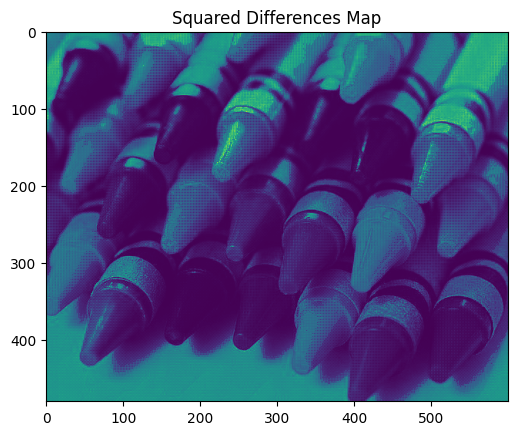

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average Per-Pixel Error: 24640.01953125
Maximum Per-Pixel Error: 125648.25


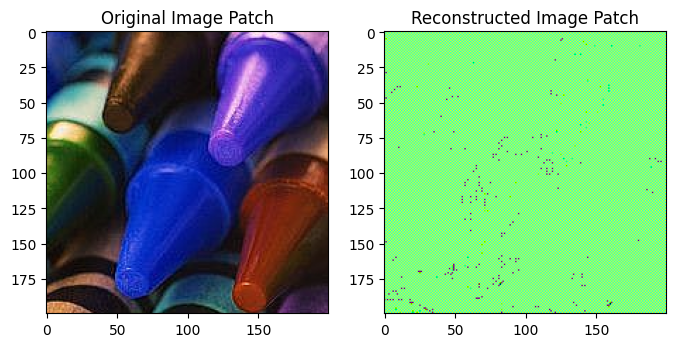

In [48]:
mosaic_img = cv2.imread('images/crayons.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = cv2.imread('images/crayons.jpg')

pp_err, max_err, error_map = compute_errors(soln_image, original_image)

# Display the error map
plt.imshow(error_map, cmap='viridis')
plt.title('Squared Differences Map')
#plt.colorbar()
plt.show()

# Display average and maximum per-pixel errors
print(f'Average Per-Pixel Error: {pp_err}')
print(f'Maximum Per-Pixel Error: {max_err}')

# Display close-up of the reconstructed image where artifacts are apparent
patch_start_row, patch_start_col = 100, 100
patch_height, patch_width = 200, 200

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.imshow(original_image[patch_start_row:patch_start_row + patch_height,
                                patch_start_col:patch_start_col + patch_width, :])
plt.title('Original Image Patch')

plt.subplot(1, 2, 2)
plt.imshow(soln_image[patch_start_row:patch_start_row + patch_height, patch_start_col:patch_start_col + patch_width, :])
plt.title('Reconstructed Image Patch')

plt.show()

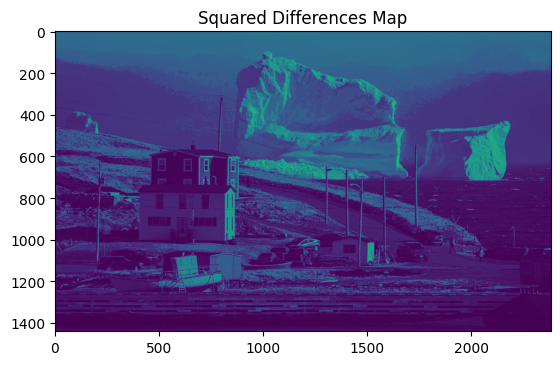

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average Per-Pixel Error: 20763.48046875
Maximum Per-Pixel Error: 123059.0


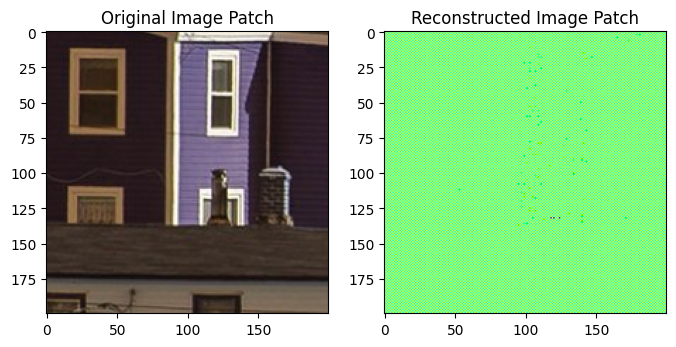

In [37]:
mosaic_img = cv2.imread('images/iceberg.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = cv2.imread('images/iceberg.jpg')

pp_err, max_err, error_map = compute_errors(soln_image, original_image)

# Display the error map
plt.imshow(error_map, cmap='viridis')
plt.title('Squared Differences Map')
#plt.colorbar()
plt.show()

# Display average and maximum per-pixel errors
print(f'Average Per-Pixel Error: {pp_err}')
print(f'Maximum Per-Pixel Error: {max_err}')

# Display close-up of the reconstructed image where artifacts are apparent
patch_start_row, patch_start_col = 600, 600
patch_height, patch_width = 200, 200

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.imshow(original_image[patch_start_row:patch_start_row + patch_height,
                                patch_start_col:patch_start_col + patch_width, :])
plt.title('Original Image Patch')

plt.subplot(1, 2, 2)
plt.imshow(soln_image[patch_start_row:patch_start_row + patch_height, patch_start_col:patch_start_col + patch_width, :])
plt.title('Reconstructed Image Patch')

plt.show()

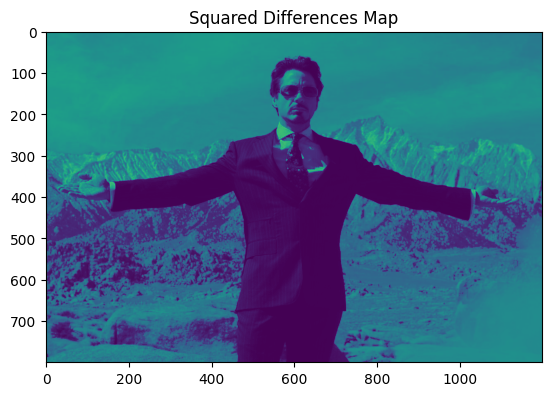

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average Per-Pixel Error: 38280.16796875
Maximum Per-Pixel Error: 118906.25


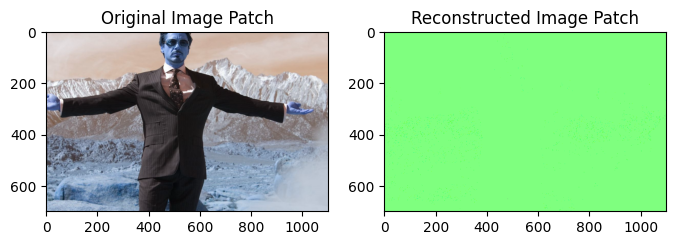

In [28]:
mosaic_img = cv2.imread('images/tony.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = cv2.imread('images/tony.jpg')

pp_err, max_err, error_map = compute_errors(soln_image, original_image)

# Display the error map
plt.imshow(error_map, cmap='viridis')
plt.title('Squared Differences Map')
#plt.colorbar()
plt.show()

# Display average and maximum per-pixel errors
print(f'Average Per-Pixel Error: {pp_err}')
print(f'Maximum Per-Pixel Error: {max_err}')

# Display close-up of the reconstructed image where artifacts are apparent
patch_start_row, patch_start_col = 100, 100
patch_height, patch_width = 2000, 2000

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.imshow(original_image[patch_start_row:patch_start_row + patch_height,
                                patch_start_col:patch_start_col + patch_width, :])
plt.title('Original Image Patch')

plt.subplot(1, 2, 2)
plt.imshow(soln_image[patch_start_row:patch_start_row + patch_height, patch_start_col:patch_start_col + patch_width, :])
plt.title('Reconstructed Image Patch')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


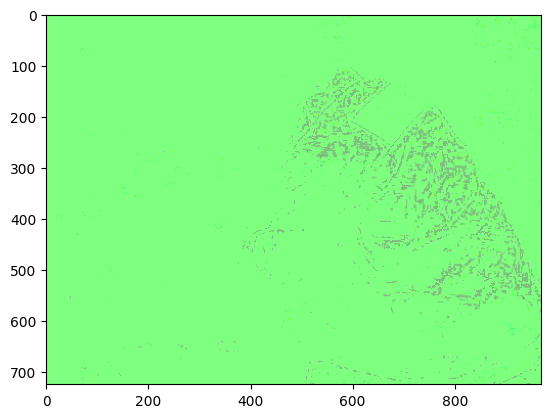

In [13]:
mosaic_img = cv2.imread('images/hope.bmp')
soln_image = get_solution_image(mosaic_img)


plt.imshow(cv2.cvtColor(soln_image, cv2.COLOR_BGR2RGB))
plt.show()

# Part 2: Freeman Method

In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import medfilt2d

def get_freeman_solution_image(mosaic_img):
    mosaic_shape = np.shape(mosaic_img)
    soln_image = np.zeros_like(mosaic_img, dtype=np.float32)

    if mosaic_shape[-1] == 4:
        # If mosaic_img has an alpha channel, remove it
        mosaic_img = mosaic_img[:,:,:3]

    # Linear interpolation for green channel
    soln_image[:, :, 1] = mosaic_img[:, :, 1]

    # Linear interpolation for blue channel
    soln_image[1::2, 0::2, 0] = (mosaic_img[:-1:2, 1::2, 0] + mosaic_img[1::2, 0::2, 0]) / 2
    soln_image[0::2, 1::2, 0] = (mosaic_img[0::2, 0::2, 0] + mosaic_img[1::2, 1::2, 0]) / 2

    # Linear interpolation for red channel
    soln_image[0::2, 0::2, 2] = (mosaic_img[0::2, 1::2, 2] + mosaic_img[1::2, 0::2, 2]) / 2
    soln_image[1::2, 1::2, 2] = (mosaic_img[:-1:2, 0::2, 2] + mosaic_img[0::2, 1::2, 2]) / 2

    # Freeman Method: Modify R and B channels using the estimated G channel
    g_channel = soln_image[:, :, 1]

    # Compute the difference images R-G and B-G
    diff_rg = soln_image[:, :, 2] - g_channel
    diff_bg = soln_image[:, :, 0] - g_channel

    # Apply median filtering to the difference images
    diff_rg_filtered = medfilt2d(diff_rg, kernel_size=3)
    diff_bg_filtered = medfilt2d(diff_bg, kernel_size=3)

    # Create the modified R and B channels
    soln_image[:, :, 2] = g_channel + diff_rg_filtered
    soln_image[:, :, 0] = g_channel + diff_bg_filtered

    return soln_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


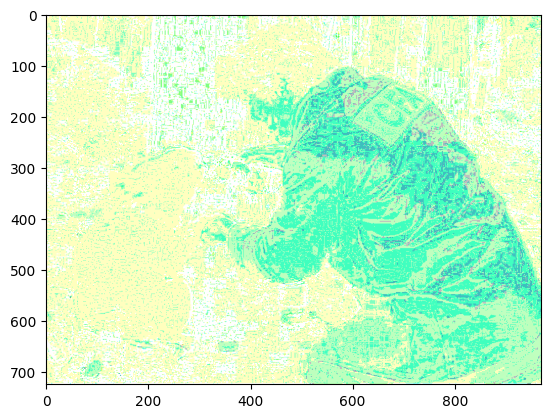

In [43]:
mosaic_img = cv2.imread('images/hope.bmp')
soln_image = get_freeman_solution_image(mosaic_img)


plt.imshow(cv2.cvtColor(soln_image, cv2.COLOR_BGR2RGB))
plt.show()

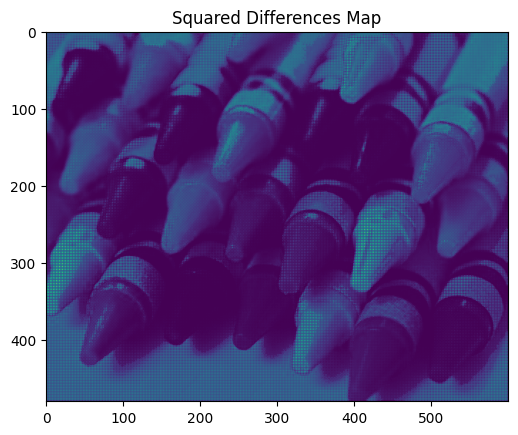

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average Per-Pixel Error: 26826.916015625
Maximum Per-Pixel Error: 210424.25


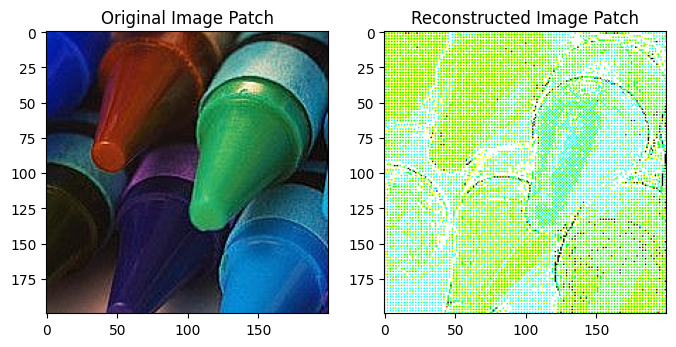

In [46]:
mosaic_img = cv2.imread('images/crayons.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = cv2.imread('images/crayons.jpg')

pp_err, max_err, error_map = compute_errors(soln_image, original_image)

# Display the error map
plt.imshow(error_map, cmap='viridis')
plt.title('Squared Differences Map')
#plt.colorbar()
plt.show()

# Display average and maximum per-pixel errors
print(f'Average Per-Pixel Error: {pp_err}')
print(f'Maximum Per-Pixel Error: {max_err}')

# Display close-up of the reconstructed image where artifacts are apparent
patch_start_row, patch_start_col = 200, 200
patch_height, patch_width = 200, 200

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.imshow(original_image[patch_start_row:patch_start_row + patch_height,
                                patch_start_col:patch_start_col + patch_width, :])
plt.title('Original Image Patch')

plt.subplot(1, 2, 2)
plt.imshow(soln_image[patch_start_row:patch_start_row + patch_height, patch_start_col:patch_start_col + patch_width, :])
plt.title('Reconstructed Image Patch')

plt.show()

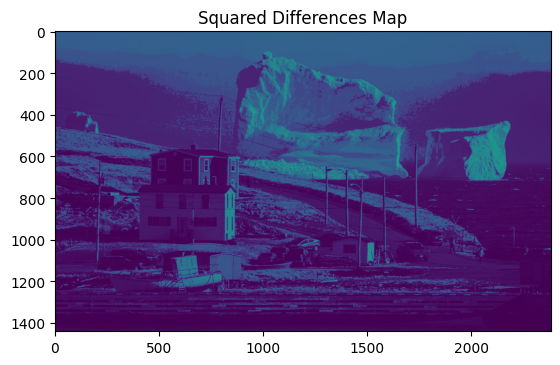

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average Per-Pixel Error: 19635.33203125
Maximum Per-Pixel Error: 141157.25


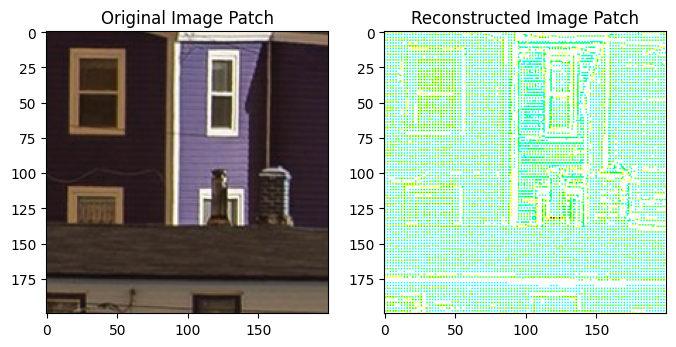

In [39]:
mosaic_img = cv2.imread('images/iceberg.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = cv2.imread('images/iceberg.jpg')

pp_err, max_err, error_map = compute_errors(soln_image, original_image)

# Display the error map
plt.imshow(error_map, cmap='viridis')
plt.title('Squared Differences Map')
#plt.colorbar()
plt.show()

# Display average and maximum per-pixel errors
print(f'Average Per-Pixel Error: {pp_err}')
print(f'Maximum Per-Pixel Error: {max_err}')

# Display close-up of the reconstructed image where artifacts are apparent
patch_start_row, patch_start_col = 600, 600
patch_height, patch_width = 200, 200

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.imshow(original_image[patch_start_row:patch_start_row + patch_height,
                                patch_start_col:patch_start_col + patch_width, :])
plt.title('Original Image Patch')

plt.subplot(1, 2, 2)
plt.imshow(soln_image[patch_start_row:patch_start_row + patch_height, patch_start_col:patch_start_col + patch_width, :])
plt.title('Reconstructed Image Patch')

plt.show()

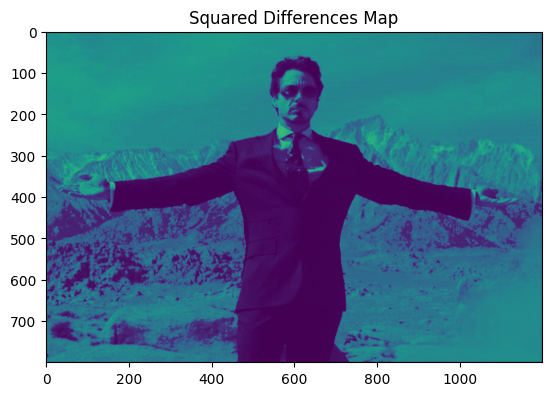

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average Per-Pixel Error: 38360.93359375
Maximum Per-Pixel Error: 119319.25


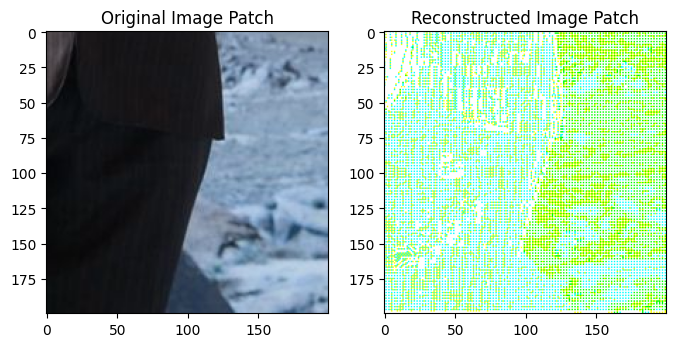

In [38]:
mosaic_img = cv2.imread('images/tony.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = cv2.imread('images/tony.jpg')

pp_err, max_err, error_map = compute_errors(soln_image, original_image)

# Display the error map
plt.imshow(error_map, cmap='viridis')
plt.title('Squared Differences Map')
#plt.colorbar()
plt.show()

# Display average and maximum per-pixel errors
print(f'Average Per-Pixel Error: {pp_err}')
print(f'Maximum Per-Pixel Error: {max_err}')

# Close-up of the reconstructed image where artifacts are apparent
patch_start_row, patch_start_col = 600, 600
patch_height, patch_width = 200, 200

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.imshow(original_image[patch_start_row:patch_start_row + patch_height,
                                patch_start_col:patch_start_col + patch_width, :])
plt.title('Original Image Patch')

plt.subplot(1, 2, 2)
plt.imshow(soln_image[patch_start_row:patch_start_row + patch_height, patch_start_col:patch_start_col + patch_width, :])
plt.title('Reconstructed Image Patch')

plt.show()

# Part 3: Practice with image operations

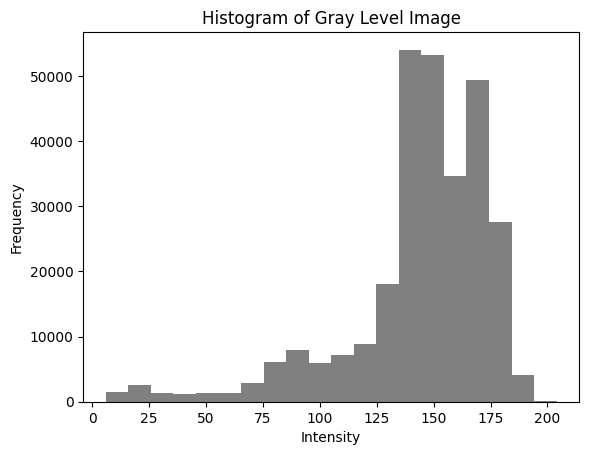

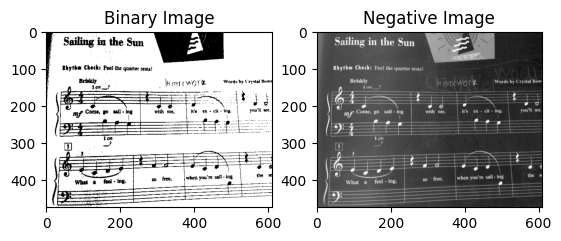

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('images/notes_color.jpg')

# Resize the image by a factor of 4
resized_image = cv2.resize(image, None, fx=0.25, fy=0.25)

# Create a new gray level image
gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Display histogram of gray level image intensities with 20 bins
hist, bins = np.histogram(gray.flatten(), bins=20)
plt.hist(gray.flatten(), bins=20, color='gray')
plt.title('Histogram of Gray Level Image')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()

# Binary image
threshold = 125
binary = np.where(gray > threshold, 255, 0)

# Negative of the gray level image
negative = 255 - gray

# Display the binary and negative images
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title('Binary Image')
plt.subplot(1, 2, 2)
plt.imshow(negative, cmap='gray')
plt.title('Negative Image')
plt.show()
